# Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('D:\Study_material\Data_Science\capstone_project\ML_practise\data\Indicators.csv')
data.shape

(5656458, 6)

In [30]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# How many UNIQUE country names are there ?

In [6]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

# Are there same number of country codes ?

In [7]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

# Are there many indicators or few ?

In [8]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

# How many years of data do we have ?

In [9]:
years = data['Year'].unique().tolist()
len(years)

56

# What's the range of years?

In [10]:
print(min(years)," to ",max(years))

1960  to  2015


# Matplotlib: Basic Plotting

In [11]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)


stage = data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


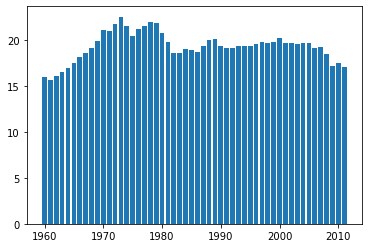

In [13]:
years = stage['Year'].values
 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

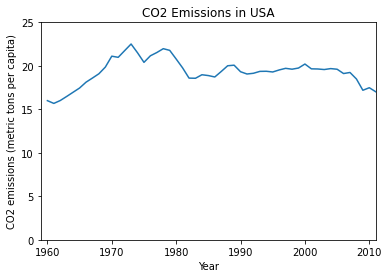

In [14]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()

In [15]:
hist_data = stage['Value'].values

In [16]:
print(len(hist_data))

52


AttributeError: 'Rectangle' object has no property 'normed'

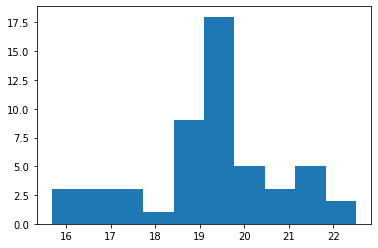

In [17]:
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [18]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [19]:
print(len(co2_2011))

232


AttributeError: 'Rectangle' object has no property 'normed'

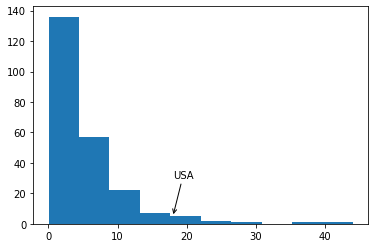

In [20]:
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [ ]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]

In [ ]:
gdp_stage.head(2)

In [ ]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

In [ ]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

In [ ]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

In [ ]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

In [37]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [38]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [39]:
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [40]:
countryFilter

['Arab World', 'Uruguay']

In [41]:
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Labor force with tertiary education, female (% of female labor force)']

In [47]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data.loc[filterMesh]

In [48]:
len(country1_data)

0

In [49]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [50]:
len(country2_data)

4

In [51]:
filteredData1 = []
filteredData2 = []

In [52]:
while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


In [53]:
indicatorsFilter

['Principal repayments on external debt, public and publicly guaranteed (PPG) (AMT, current US$)']

In [54]:
len(filteredData1)

5

In [55]:
while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

Skipping ... Slovenia, since very few rows (0) found


In [56]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [57]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [58]:
filteredData1

,CountryName,IndicatorName,Year,Value
4991829,Sierra Leone,"Principal repayments on external debt, public ...",2010,4837000.0
5170241,Sierra Leone,"Principal repayments on external debt, public ...",2011,7038000.0
5345662,Sierra Leone,"Principal repayments on external debt, public ...",2012,7987000.0
5505363,Sierra Leone,"Principal repayments on external debt, public ...",2013,9929000.0
5622043,Sierra Leone,"Principal repayments on external debt, public ...",2014,13959000.0


In [59]:
filteredData2

,CountryName,IndicatorName,Year,Value
4897898,"Congo, Rep.","Principal repayments on external debt, public ...",2010,116347000.0
5081100,"Congo, Rep.","Principal repayments on external debt, public ...",2011,114388000.0
5256968,"Congo, Rep.","Principal repayments on external debt, public ...",2012,141252000.0
5426656,"Congo, Rep.","Principal repayments on external debt, public ...",2013,264600000.0
5567172,"Congo, Rep.","Principal repayments on external debt, public ...",2014,262188000.0


# Example: Scatter Plot

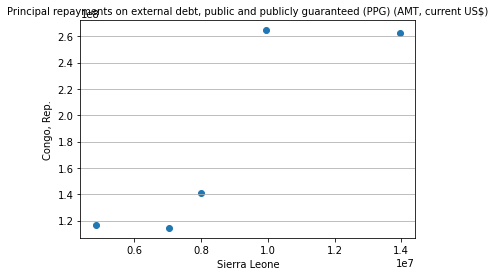

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

# Example: Line Plot

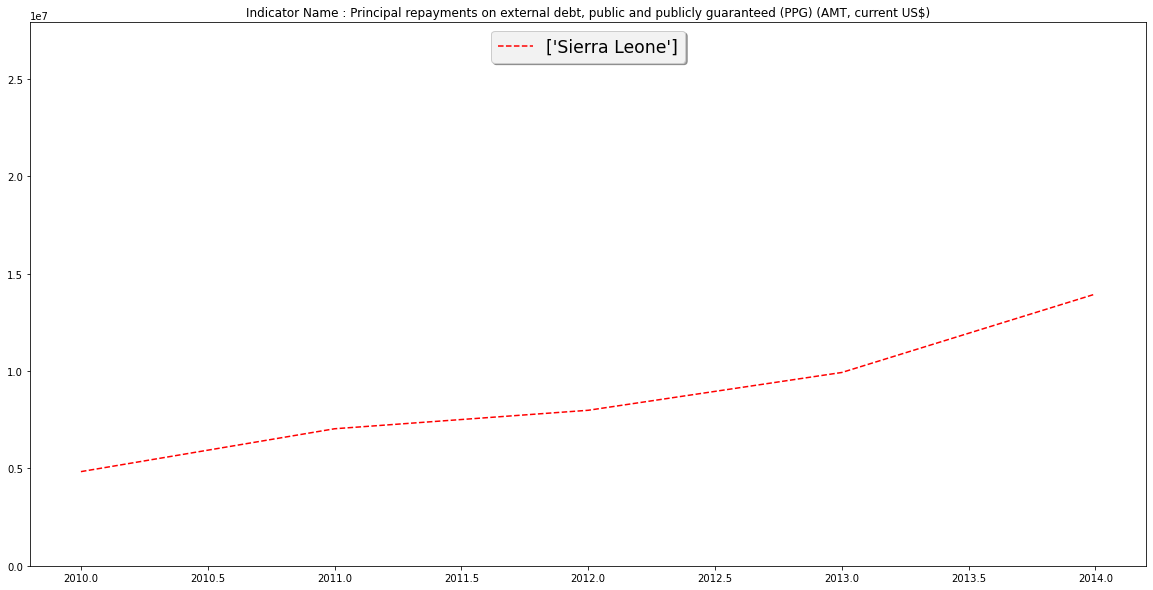

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# plotting country 2

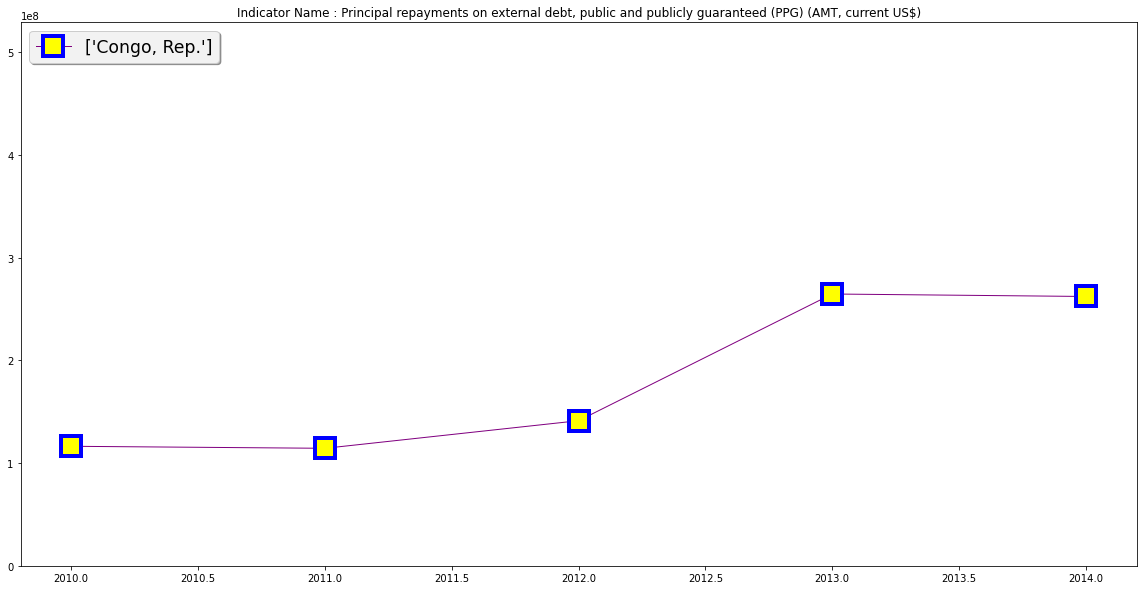

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Example (random datasets)

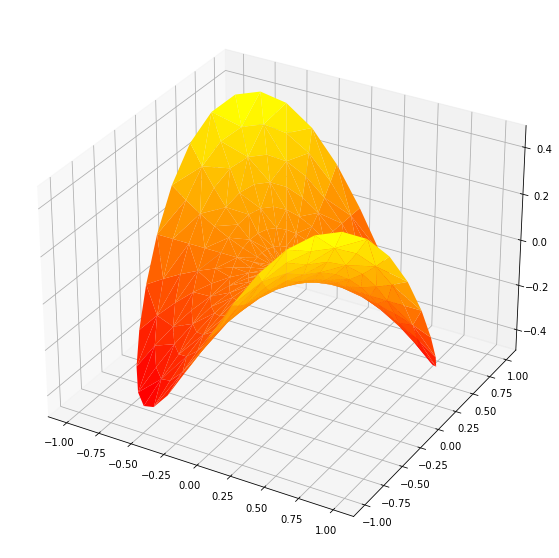

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

# Example (random dataset)

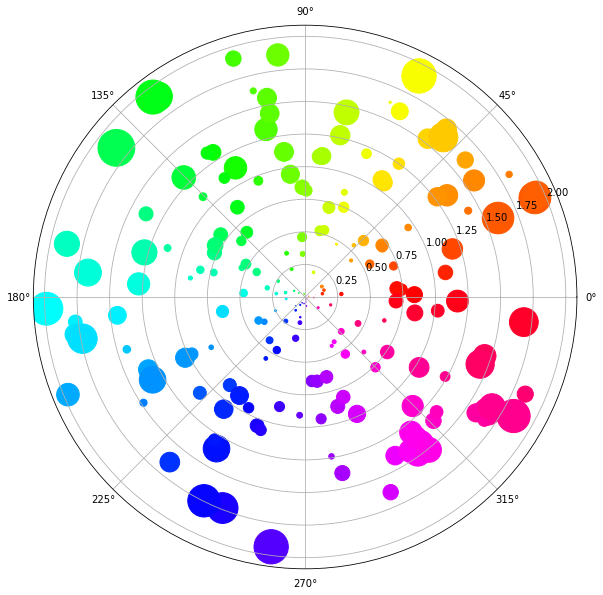

In [65]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

# Box Plots (random datasets)

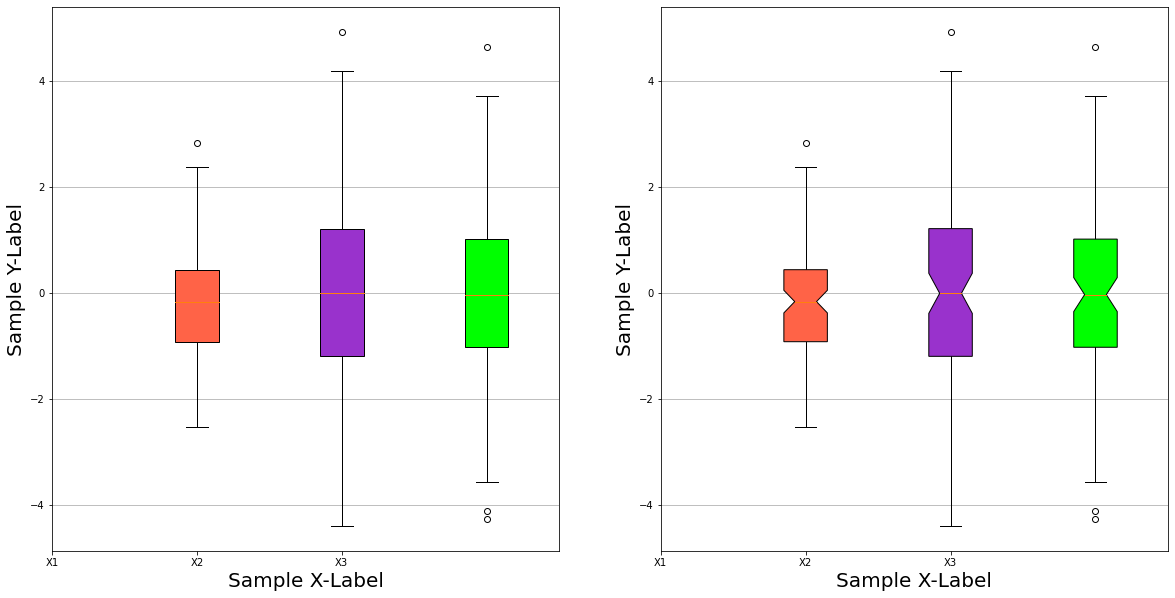

In [67]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']


for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")